In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage

from asi import path_config
from asi.utils import search_closest_index

In [2]:
csv_root = path_config.lectures / "LectureExercise #1, CSV/csv files"


labels = []
arrays = []
_df = pd.read_csv(next(csv_root.glob("*.csv")))
wavelengths = _df["nm"]
for path in list(csv_root.glob("*.csv")):
    label = path.stem.split(".")[0]
    labels.append(label)
    df = pd.read_csv(path)
    assert df["nm"].equals(wavelengths)
    arrays.append(df[" %R"].to_numpy())
all_spectra = np.array(arrays).T

In [3]:

visible_max = 760
wavelengths = _df["nm"].to_list()
visible_max_index = search_closest_index(wavelengths, visible_max)



# Cluster with visible wavelengths

Text(0.5, 0, 'Wavelength [nm]')

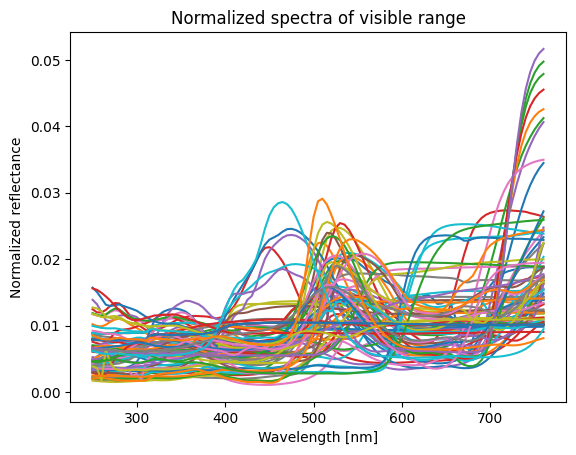

In [4]:
visible_range = slice(visible_max_index, None)

visible_wl = wavelengths[visible_range]
visible_spectra = all_spectra[visible_range]

# normalize
visible_spectra = visible_spectra / visible_spectra.sum(axis=0)

fig, ax = plt.subplots()
ax.plot(visible_wl, visible_spectra)
ax.set_title("Normalized spectra of visible range")
ax.set_ylabel("Normalized reflectance")
ax.set_xlabel("Wavelength [nm]")

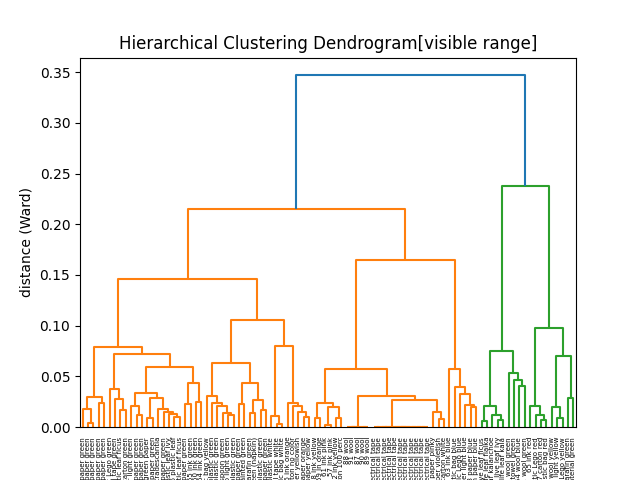

In [5]:
%matplotlib widget

Z = linkage(visible_spectra.T, "ward")
fig, ax = plt.subplots()
ax.set_title("Hierarchical Clustering Dendrogram[visible range]")

# Plot axis labels
ax.set_xlabel("sample index")
ax.set_ylabel("distance (Ward)")

# Make the dendrogram
_ = dendrogram(Z, labels=labels, leaf_rotation=90, ax=ax)


# Cluster with IR wavelengths

In [6]:
ir_range = slice(0, visible_max)
ir_wl = wavelengths[ir_range]
ir_spectra = all_spectra[ir_range]
ir_spectrum = all_spectra[ir_range].sum(axis=0)

Text(0.5, 0, 'Wavelength [nm]')

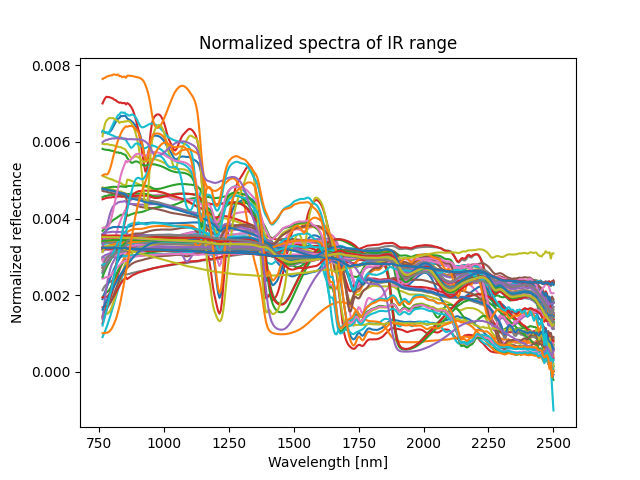

In [7]:
ir_range = slice(0, visible_max_index)

ir_wl = wavelengths[ir_range]
ir_spectra = all_spectra[ir_range]

# normalize
ir_spectra = ir_spectra / ir_spectra.sum(axis=0)

fig, ax = plt.subplots()
ax.plot(ir_wl, ir_spectra)
ax.set_title("Normalized spectra of IR range")
ax.set_ylabel("Normalized reflectance")
ax.set_xlabel("Wavelength [nm]")

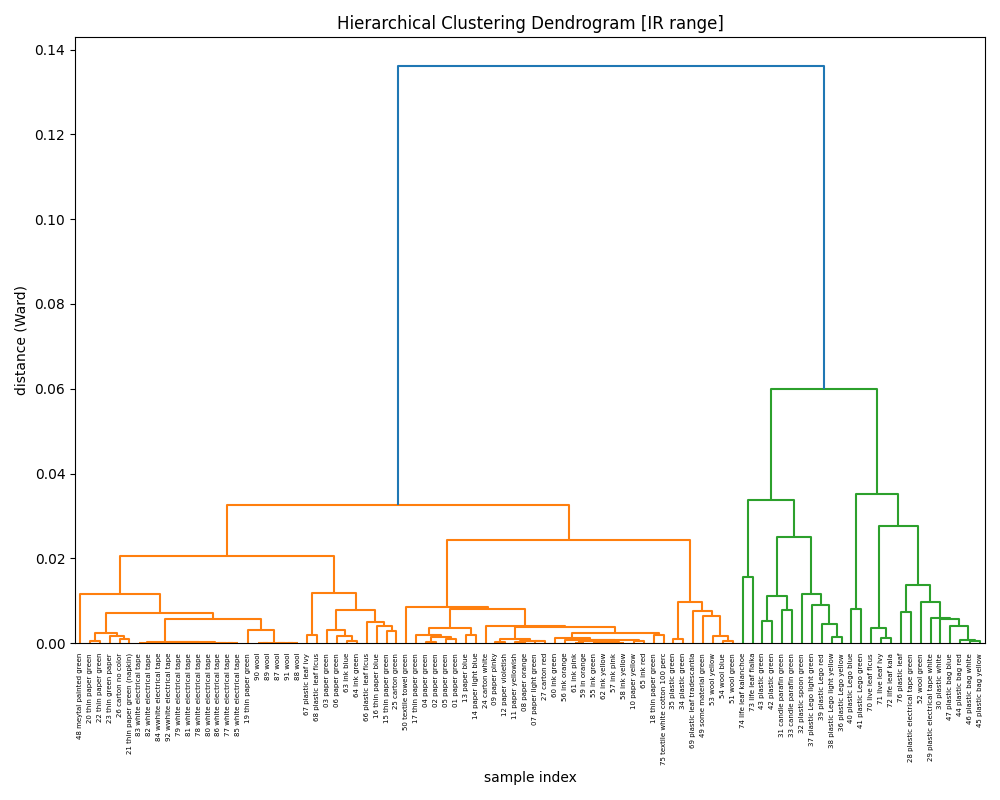

In [8]:

Z = linkage(ir_spectra.T, "ward")
fig, ax = plt.subplots(tight_layout=True, figsize=(10, 8))
ax.set_title("Hierarchical Clustering Dendrogram [IR range]")

# Plot axis labels
ax.set_xlabel("sample index")
ax.set_ylabel("distance (Ward)")

# Make the dendrogram
_ = dendrogram(Z, labels=labels, leaf_rotation=90, ax=ax)